# Visualization of border effects

This notebook aims to evaluate the border effects after prediction using the Deep Learning model.
To execute the notebook, you need to have the following data:
- a true label h5 file of cubes with shape (n, w, h) where n is the number of cubes, w is the width of the cube and h is the height of the cube.
- a predicted label h5 file of cubes with shape (n, w, h) where n is the number of cubes, w is the width of the cube and h is the height of the cube.

In [228]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [571]:
# Open the h5 file
labels = h5py.File('labels.h5', 'r')["labels"][:]
predictions = h5py.File('predictions.h5', 'r')["predictions"][:]

In [572]:
print("Labels shape: ", labels.shape)
print("Predictions shape: ", predictions.shape)

Labels shape:  (6400, 64, 64)
Predictions shape:  (6400, 64, 64)


In [573]:
np.unique(labels, return_counts=True)

(array([  0,   1,   2,   3,   4, 255], dtype=uint8),
 array([11326301,  5815745,  3692175,  1341175,   170309,  3868695]))

In [574]:
count_black_pixels = np.sum(labels == 255, axis=0)
count_white_pixels = labels.shape[0] - count_black_pixels
count_white_pixels

array([[5266, 5268, 5262, ..., 5347, 5355, 5350],
       [5261, 5265, 5258, ..., 5351, 5352, 5354],
       [5295, 5295, 5296, ..., 5350, 5358, 5365],
       ...,
       [5447, 5451, 5446, ..., 5516, 5517, 5513],
       [5449, 5449, 5451, ..., 5517, 5521, 5521],
       [5454, 5452, 5450, ..., 5522, 5531, 5532]])

In [575]:
equality_array = (labels == predictions).astype(int)
synthesis_accuracy = equality_array.sum(axis=0) / count_white_pixels
synthesis_accuracy.shape

(64, 64)

In [576]:
from scipy.signal import convolve2d
# Apply a blur filter
SIZE_BLUR = 10
blur_filter = np.ones((SIZE_BLUR, SIZE_BLUR)) / SIZE_BLUR**2
synthesis_accuracy_blurred = convolve2d(synthesis_accuracy, blur_filter, mode='same', boundary='symm')

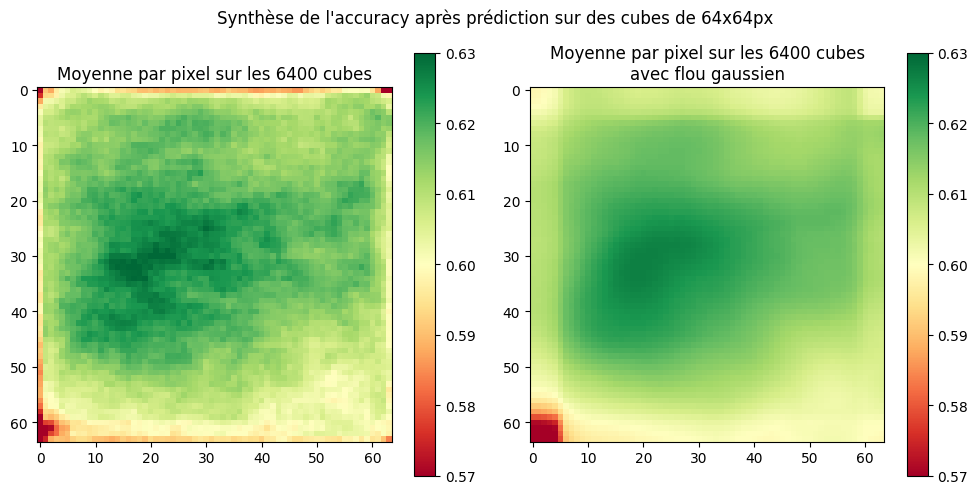

In [581]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

fig.suptitle(f"Synthèse de l'accuracy après prédiction sur des cubes de {labels.shape[1]}x{labels.shape[2]}px")

# Plot the not blurred image
im1 = axs[0].imshow(synthesis_accuracy, cmap="RdYlGn")
axs[0].set_title(f'Moyenne par pixel sur les {labels.shape[0]} cubes')
# Change color range

# Plot the blurred image
im2 = axs[1].imshow(synthesis_accuracy_blurred, cmap="RdYlGn")
axs[1].set_title(f'Moyenne par pixel sur les {labels.shape[0]} cubes\navec flou gaussien')

im1.set_clim(0.57, 0.63)
im2.set_clim(0.57, 0.63)

fig.colorbar(im1, ax=axs[0])
fig.colorbar(im2, ax=axs[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

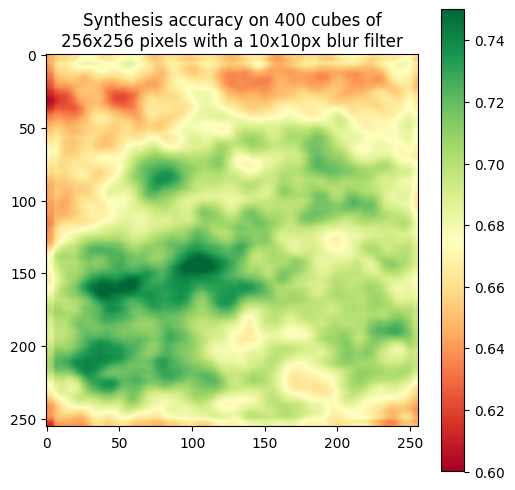

In [236]:
# Plot heat map
plt.figure(figsize=(6, 6))
plt.imshow(synthesis_accuracy_blurred, cmap="RdYlGn")
plt.colorbar()
plt.title(f'Synthesis accuracy on {labels.shape[0]} cubes of\n{labels.shape[1]}x{labels.shape[2]} pixels with a {SIZE_BLUR}x{SIZE_BLUR}px blur filter')
# Change color range
plt.clim(0.6, 0.75)
plt.show()

In [237]:
labels_binary = np.where(labels == 0, 0, np.where(labels == 255, 255, 2))
predictions_binary = np.where(predictions == 0, 0, np.where(predictions == 255, 255, 2))

In [238]:
equality_array_binary = (labels_binary == predictions_binary).astype(int)
synthesis_accuracy_binary = equality_array_binary.sum(axis=0) / count_white_pixels
synthesis_accuracy_binary.shape

(256, 256)

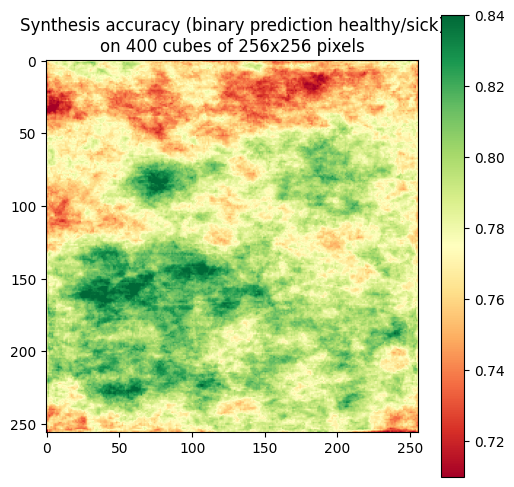

In [239]:
# Plot heat map
plt.figure(figsize=(6, 6))
plt.imshow(synthesis_accuracy_binary, cmap="RdYlGn")
plt.colorbar()
plt.title(f'Synthesis accuracy (binary prediction healthy/sick)\non {labels.shape[0]} cubes of {labels.shape[1]}x{labels.shape[2]} pixels')
# Change color range
plt.clim(0.71, 0.84)
plt.show()

In [240]:
synthesis_accuracy_binary_blurred = convolve2d(synthesis_accuracy_binary, blur_filter, mode='same', boundary='symm')

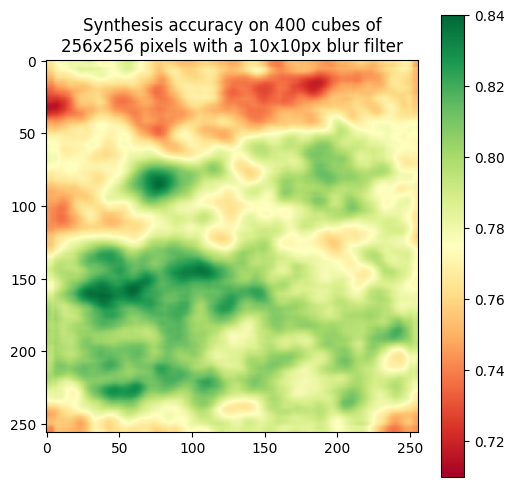

In [241]:
# Plot heat map
plt.figure(figsize=(6, 6))
plt.imshow(synthesis_accuracy_binary_blurred, cmap="RdYlGn")
plt.colorbar()
plt.title(f'Synthesis accuracy on {labels.shape[0]} cubes of\n{labels.shape[1]}x{labels.shape[2]} pixels with a {SIZE_BLUR}x{SIZE_BLUR}px blur filter')
# Change color range
plt.clim(0.71, 0.84)
plt.show()

In [242]:
equality_array_norm = np.abs(labels - predictions)
equality_array_norm = np.where(equality_array_norm > 200, 0, equality_array_norm)
synthesis_accuracy_norm = (4 - equality_array_norm.sum(axis=0) / count_white_pixels) / 4
synthesis_accuracy_norm.shape

(256, 256)

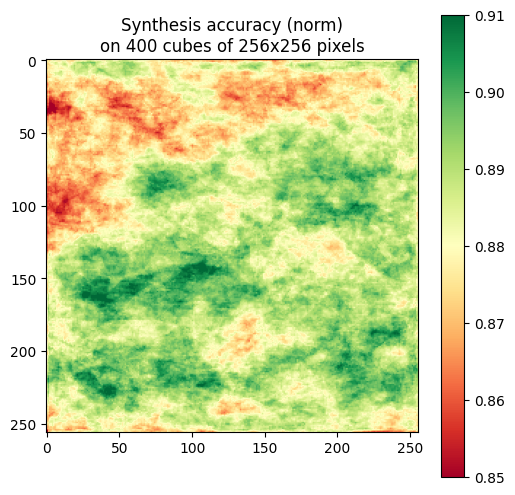

In [243]:
# Plot heat map
plt.figure(figsize=(6, 6))
plt.imshow(synthesis_accuracy_norm, cmap="RdYlGn")
plt.colorbar()
plt.title(f'Synthesis accuracy (norm)\non {labels.shape[0]} cubes of {labels.shape[1]}x{labels.shape[2]} pixels')
# Change color range
plt.clim(0.85, 0.91)
plt.show()

In [244]:
synthesis_accuracy_norm_blurred = convolve2d(synthesis_accuracy_norm, blur_filter, mode='same', boundary='symm')

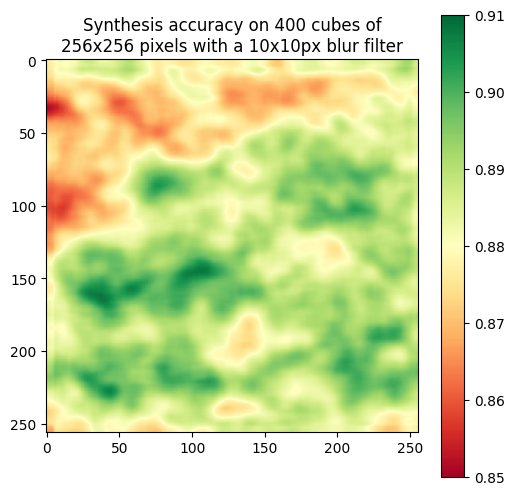

In [245]:
# Plot heat map
plt.figure(figsize=(6, 6))
plt.imshow(synthesis_accuracy_norm_blurred, cmap="RdYlGn")
plt.colorbar()
plt.title(f'Synthesis accuracy on {labels.shape[0]} cubes of\n{labels.shape[1]}x{labels.shape[2]} pixels with a {SIZE_BLUR}x{SIZE_BLUR}px blur filter')
# Change color range
plt.clim(0.85, 0.91)
plt.show()

In [512]:
import scipy.stats as stats

def get_k_student(n, confidence_level):
    return stats.t.ppf((1+confidence_level)/2, n)

In [583]:
# Define the center values of the zones to compare
NB_ZONES = 15
total_nb_pixels = labels.shape[1]**2
total_per_zone = total_nb_pixels // NB_ZONES
zone_limits = [0]
temp_total = 0
for i in range(labels.shape[1]):
    n = 4 * (labels.shape[1] - 2*i - 1)
    temp_total += n
    if temp_total >= total_per_zone:
        zone_limits.append(i)
        temp_total -= total_per_zone
print(f"Zone limits: {zone_limits}")

zone_widths = []
zone_centers = []

for i in range(len(zone_limits) - 1):
    zone_widths.append(zone_limits[i+1] - zone_limits[i])
    zone_centers.append((zone_limits[i] -1 + zone_limits[i+1]) / 2)
zone_centers[-1] = labels.shape[1]//2
print(f"Zone widths: {zone_widths}")
print(f"Zone centers: {zone_centers}")

Zone limits: [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 13, 15, 17, 20, 23, 31]
Zone widths: [1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 8]
Zone centers: [0.0, 1.0, 2.0, 3.0, 4.0, 5.5, 7.0, 8.5, 10.0, 11.5, 13.5, 15.5, 18.0, 21.0, 32]


In [584]:
# Compute full incertitudes
CONFIDENCE_LEVEL = 0.99

cur_equality_array = equality_array #(4-equality_array_norm)/4

accuracy_from_center = np.zeros(NB_ZONES)
incertitudes_from_center = np.zeros((NB_ZONES, 2))

for i, zone_i in enumerate(zone_limits[:-1]):
    values = []
    n = int(4 * zone_widths[i] * (labels.shape[1] - 1) - 4 * ((zone_i + zone_widths[i]) * (zone_i + zone_widths[i] - 1) - zone_i * (zone_i - 1)))
    for j in range(zone_i, zone_i+zone_widths[i]):
        for k, cube in enumerate(cur_equality_array):
            cubes_without_black = np.where(labels[k] != 255, cube, -1)
            values.extend(cubes_without_black[j, j:-(j+1)])
            values.extend(cubes_without_black[j:-(j+1), j])
            values.extend(cubes_without_black[-j, j:-(j+1)])
            values.extend(cubes_without_black[j:-(j+1), -j])
    global_n = n * labels.shape[0]
    if len(values) != global_n:
        raise ValueError("Error in the number of values")
    # Remove -1 values
    values = np.array(values)
    values = values[values != -1]
    
    k = get_k_student(len(values)-1, CONFIDENCE_LEVEL)
    x_mean = np.mean(values)
    delta = k * np.std(values) / np.sqrt(n)
    accuracy_from_center[-(i+1)] = x_mean
    incertitudes_from_center[-(i+1)] = [x_mean - delta, x_mean + delta]

In [585]:
from matplotlib.patches import PathPatch
from matplotlib.markers import MarkerStyle
from matplotlib.path import Path

# Example of a diamond-shaped marker
verts = np.array([
    [0, 2],
    [-1, 2], [1, 2], [0, 2],
    [0, -2],
    [-1, -2], [1, -2], [0, -2],
])
cursor = Path(verts)

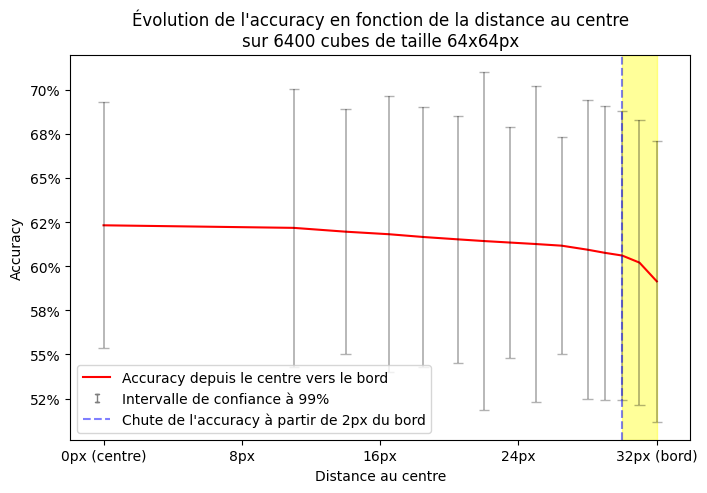

In [588]:
x_max = labels.shape[1]//2
zone_centers_from_center = x_max - np.array(zone_centers[::-1])
plt.figure(figsize=(8, 5))
plt.plot(zone_centers_from_center, 100 * accuracy_from_center, label='Accuracy depuis le centre vers le bord', color='red')

for pos, (incertitude_min, incertitude_max) in zip(zone_centers_from_center, incertitudes_from_center):
    alpha = 0.3
    plt.vlines(pos, 100 * incertitude_min, 100 * incertitude_max, color='black', alpha=alpha, lw=1.3)
    plt.hlines(100 * incertitude_min, pos-0.3, pos+0.3, color='black', alpha=alpha, lw=1)
    plt.hlines(100 * incertitude_max, pos-0.3, pos+0.3, color='black', alpha=alpha, lw=1)
# Add the incertitudes in the legend
plt.plot([], [], color='black', marker=MarkerStyle(cursor), linestyle="", alpha=0.5, lw=1.3, label=f'Intervalle de confiance à {int(100*CONFIDENCE_LEVEL)}%')

plt.title(f"Évolution de l'accuracy en fonction de la distance au centre\nsur {labels.shape[0]} cubes de taille {labels.shape[1]}x{labels.shape[2]}px")
NB_TICKS = 4
ticks = [i * x_max//NB_TICKS for i in range(0, NB_TICKS+1)]
plt.xticks(ticks=ticks,
           labels=["0px (centre)", *[f"{tick}px" for tick in ticks[1:-1]], f"{x_max}px (bord)"])
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
DROP_ACCURACY = 30
y_min, y_max = 100*np.min(incertitudes_from_center[:, 0])-1, 100*np.max(incertitudes_from_center[:, 1])+1
y_min, y_max = max(0, y_min), min(100, y_max)
plt.ylim(y_min, y_max)
plt.vlines(DROP_ACCURACY,
           y_min, y_max,
           color='blue', linestyle='--', alpha=0.5,
           label=f"Chute de l'accuracy à partir de {int(np.ceil(x_max - DROP_ACCURACY))}px du bord")
# Plot an opaque rectangle
plt.fill_between([DROP_ACCURACY, x_max], y_min, y_max, color='yellow', alpha=0.4)
plt.ylabel('Accuracy')
plt.xlabel('Distance au centre')
# Display legend in bottom left corner
plt.legend(loc='lower left')
plt.show()